In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

### Import Dataset

In [2]:
titanic = pd.read_csv('titanic_passenger.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Sex             891 non-null    object 
 2   Age             714 non-null    float64
 3   SiblingsSpouse  891 non-null    int64  
 4   ParentChildren  891 non-null    int64  
 5   Fare            891 non-null    float64
 6   EmbarkedCity    889 non-null    object 
 7   Class           891 non-null    object 
 8   Deck            203 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


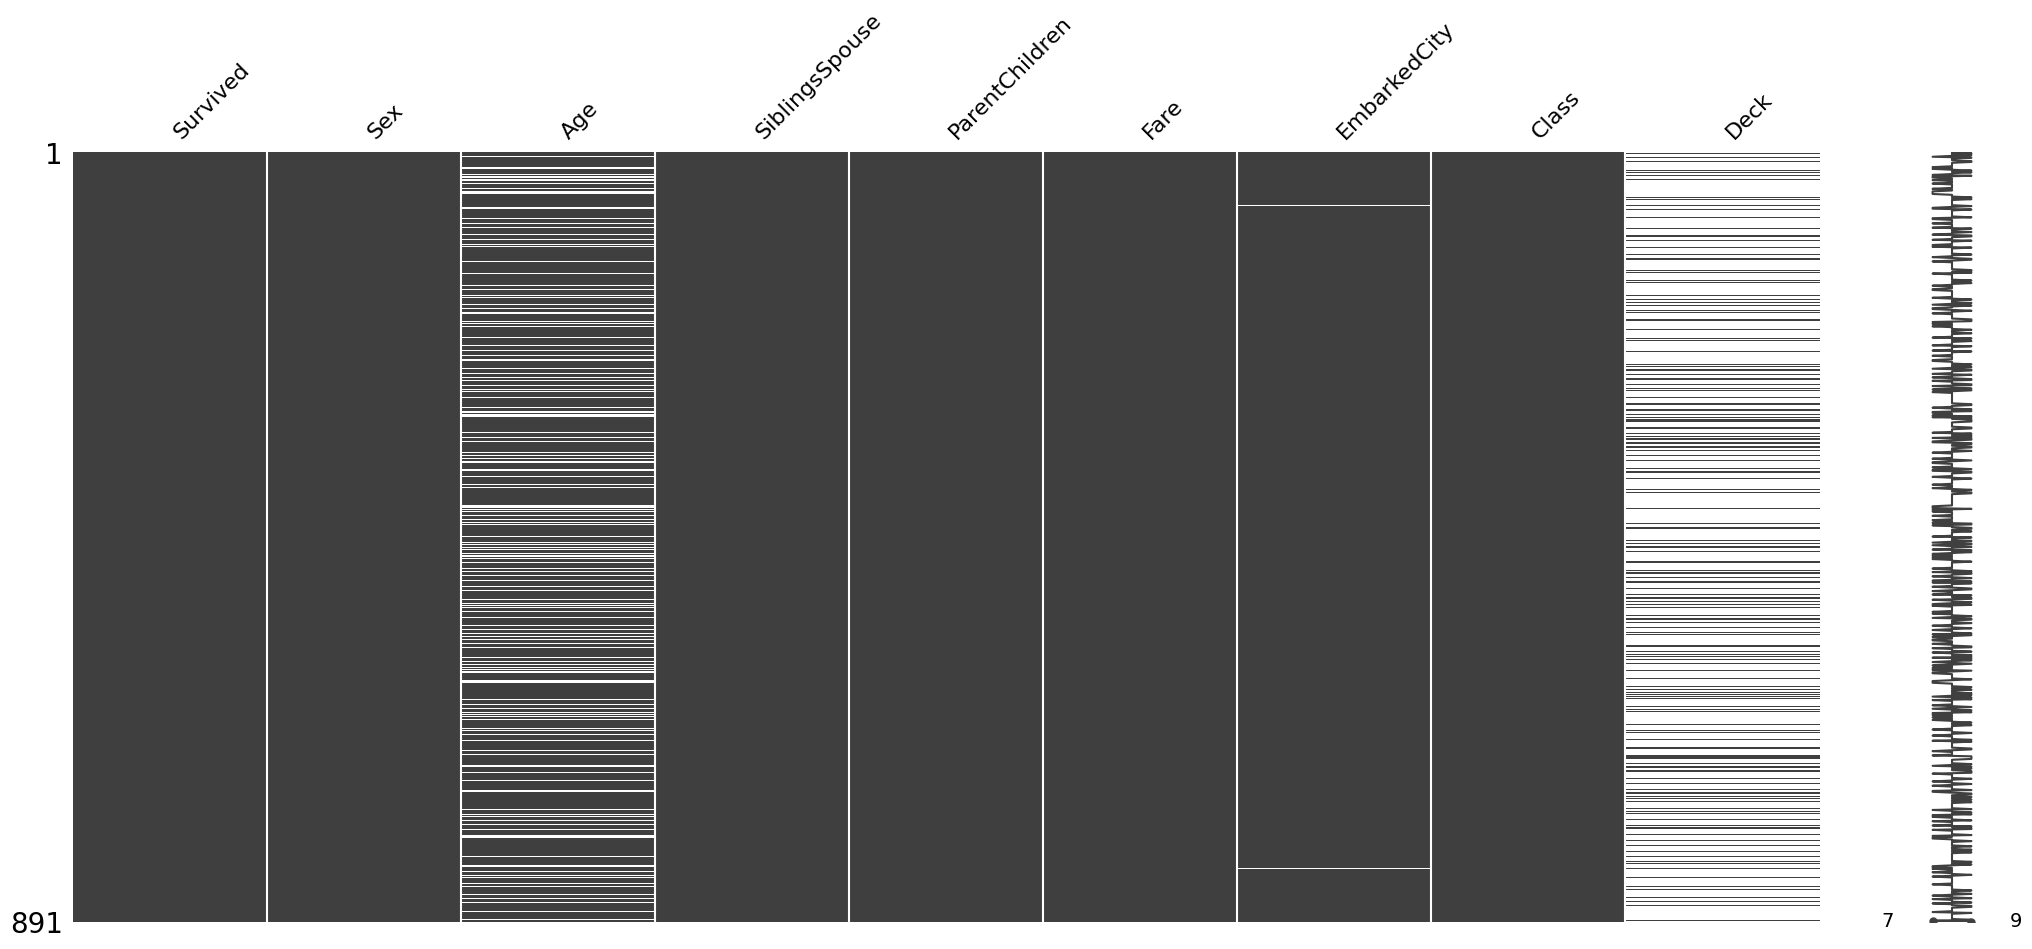

In [5]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(titanic)
plt.show()

### Clean Dataset

- Remove `Deck` feature
- Remove the 2 missing rows in `EmbarkedCity` feature

In [19]:
titanic_update = titanic.drop('Deck', axis = 'columns')

In [20]:
titanic_update = titanic_update[~titanic_update['EmbarkedCity'].isnull()].reset_index(drop = True)

In [22]:
titanic_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Sex             889 non-null    object 
 2   Age             712 non-null    float64
 3   SiblingsSpouse  889 non-null    int64  
 4   ParentChildren  889 non-null    int64  
 5   Fare            889 non-null    float64
 6   EmbarkedCity    889 non-null    object 
 7   Class           889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.7+ KB


For `Age` column, we're going to create an 'imputation dataset'

In [23]:
age_imputation_df = titanic_update.groupby(['Sex', 'EmbarkedCity', 'Class'])['Age'].median().reset_index()

In [24]:
age_imputation_df

,Sex,EmbarkedCity,Class,Age
0,female,C,First,37.00
1,female,C,Second,22.00
2,female,C,Third,14.25
3,female,Q,First,33.00
4,female,Q,Second,30.00
5,female,Q,Third,20.00
6,female,S,First,33.00
7,female,S,Second,29.00
8,female,S,Third,23.00
9,male,C,First,36.50


In [33]:
titanic_update = titanic_update.merge(age_imputation_df, on = ['Sex', 'EmbarkedCity', 'Class'], how = 'left')

In [34]:
titanic_update

,Survived,Sex,Age_x,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class,Age_y
0,0,male,22.0,1,0,7.2500,S,Third,25.0
1,1,female,38.0,1,0,71.2833,C,First,37.0
2,1,female,26.0,0,0,7.9250,S,Third,23.0
3,1,female,35.0,1,0,53.1000,S,First,33.0
4,0,male,35.0,0,0,8.0500,S,Third,25.0
...,...,...,...,...,...,...,...,...,...
884,0,male,27.0,0,0,13.0000,S,Second,30.0
885,1,female,19.0,0,0,30.0000,S,First,33.0
886,0,female,NaN,1,2,23.4500,S,Third,23.0
887,1,male,26.0,0,0,30.0000,C,First,36.5


In [36]:
titanic_update['Age'] = titanic_update['Age_x'].replace('', pd.NA).fillna(titanic_update['Age_y'])

In [38]:
titanic_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Sex             889 non-null    object 
 2   Age_x           712 non-null    float64
 3   SiblingsSpouse  889 non-null    int64  
 4   ParentChildren  889 non-null    int64  
 5   Fare            889 non-null    float64
 6   EmbarkedCity    889 non-null    object 
 7   Class           889 non-null    object 
 8   Age_y           889 non-null    float64
 9   Age             889 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 76.4+ KB


In [39]:
titanic_update.drop(['Age_x', 'Age_y'], axis = 'columns', inplace = True)

In [40]:
titanic_update

,Survived,Sex,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class,Age
0,0,male,1,0,7.2500,S,Third,22.0
1,1,female,1,0,71.2833,C,First,38.0
2,1,female,0,0,7.9250,S,Third,26.0
3,1,female,1,0,53.1000,S,First,35.0
4,0,male,0,0,8.0500,S,Third,35.0
...,...,...,...,...,...,...,...,...
884,0,male,0,0,13.0000,S,Second,27.0
885,1,female,0,0,30.0000,S,First,19.0
886,0,female,1,2,23.4500,S,Third,23.0
887,1,male,0,0,30.0000,C,First,26.0


### One-Hot Encoding

In [41]:
gendermap = {
    'male':1,
    'female':0
}

classmap = {
    'First':1,
    'Second':2,
    'Third':3
}

titanic_update['Sex'] = titanic_update['Sex'].map(gendermap)
titanic_update['Class'] = titanic_update['Class'].map(classmap)

In [43]:
titanic_update = pd.get_dummies(titanic_update)

In [44]:
titanic_update

,Survived,Sex,SiblingsSpouse,ParentChildren,Fare,Class,Age,EmbarkedCity_C,EmbarkedCity_Q,EmbarkedCity_S
0,0,1,1,0,7.2500,3,22.0,0,0,1
1,1,0,1,0,71.2833,1,38.0,1,0,0
2,1,0,0,0,7.9250,3,26.0,0,0,1
3,1,0,1,0,53.1000,1,35.0,0,0,1
4,0,1,0,0,8.0500,3,35.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,1,0,0,13.0000,2,27.0,0,0,1
885,1,0,0,0,30.0000,1,19.0,0,0,1
886,0,0,1,2,23.4500,3,23.0,0,0,1
887,1,1,0,0,30.0000,1,26.0,1,0,0


### Let's Train a Model

In [45]:
x = titanic_update.drop('Survived', axis = 'columns')
y = titanic_update[['Survived']]

In [46]:
rfc = RandomForestClassifier()
rfc.fit(x,y)

C:\Users\User\AppData\Local\Temp\ipykernel_15460\2792637980.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x,y)


RandomForestClassifier()

### Save the Model & Age Imputation Dataframe

In [51]:
import pickle
filename = 'rfc_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [52]:
age_imputation_df.to_csv('age_imputation_df.csv', index = False)

### Resample Rows for Demonstration Purposes

In [62]:
titanic[~titanic['Age'].isnull()]

,Survived,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class,Deck
0,0,male,22.0,1,0,7.2500,S,Third,NaN
1,1,female,38.0,1,0,71.2833,C,First,C
2,1,female,26.0,0,0,7.9250,S,Third,NaN
3,1,female,35.0,1,0,53.1000,S,First,C
4,0,male,35.0,0,0,8.0500,S,Third,NaN
...,...,...,...,...,...,...,...,...,...
885,0,female,39.0,0,5,29.1250,Q,Third,NaN
886,0,male,27.0,0,0,13.0000,S,Second,NaN
887,1,female,19.0,0,0,30.0000,S,First,B
889,1,male,26.0,0,0,30.0000,C,First,C


In [60]:
set_1 = titanic.iloc[15:20, :].copy()
set_1.drop('Survived', axis = 'columns', inplace = True)
set_1

,Sex,Age,SiblingsSpouse,ParentChildren,Fare,EmbarkedCity,Class,Deck
15,female,55.0,0,0,16.000,S,Second,NaN
16,male,2.0,4,1,29.125,Q,Third,NaN
17,male,NaN,0,0,13.000,S,Second,NaN
18,female,31.0,1,0,18.000,S,Third,NaN
19,female,NaN,0,0,7.225,C,Third,NaN


Description: `set_1` is prediction data with missing values in Age column, and still has categorical features in 'Sex', and 'Class' columns. Furthermore, we haven't removed the 'Deck' column

If we directly predict `set_1` using our model, it will cause an error

In [67]:
rfc.predict(set_1)

C:\Users\User\anaconda3\envs\testdemo\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Deck
- EmbarkedCity
Feature names seen at fit time, yet now missing:
- EmbarkedCity_C
- EmbarkedCity_Q
- EmbarkedCity_S

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'female'